In [148]:
# Importing required libraries for analyzing the data.
import pandas as pd
import numpy as np
from scipy import stats
import seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter('ignore')
from sklearn.manifold import TSNE

from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier,export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# Preparing the data to process by reading it from the file.
data_abalone = pd.read_csv('/Users/kushpatel/Documents/UW/657A/5. Assignments/2. Assignment 2/abalone_kaggle.csv')
# print(data_abalone.head())
data_wqr = pd.read_csv('/Users/kushpatel/Documents/UW/657A/5. Assignments/2. Assignment 2/Code/wqr.csv', sep = ";")
data_wqr['color'] = 'red'
# print(data_wqr.head())
data_wqw = pd.read_csv('/Users/kushpatel/Documents/UW/657A/5. Assignments/2. Assignment 2/Code/wqw.csv', sep = ";")
data_wqw['color'] = 'white'
# print(data_wqw.head())

#Merge the data:
data_wq = pd.concat([data_wqr,data_wqw],ignore_index = True)

In [4]:
#To check if there are any missing values.
data_wq.info()
data_wq.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

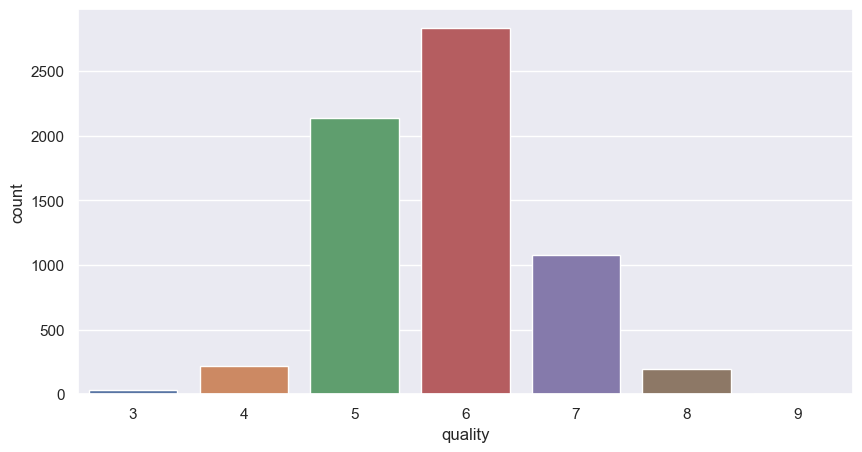

In [5]:
#To check if the dataset is balanced or not
seaborn.set(rc={'figure.figsize':(10,5)})
seaborn.countplot(data=data_wq,x=data_wq['quality'])

In [6]:
# The dataset is balanced, normally distributed with the mean as quality 6 with maximum occurences in the data.

In [53]:
# One Hot Encoding for converting the categorical variables into numerical values for Abalone and Wine datesets.
data_a_oh = (pd.get_dummies(data_abalone['Sex'])).astype(int)
data_abalone_oh = pd.concat([data_abalone, data_a_oh], axis=1)
data_abalone_oh = data_abalone_oh.drop(['Sex'],axis=1)
# data_abalone_oh.head()

data_wine_oh = (pd.get_dummies(data_wq['color'])).astype(int)
data_wq_oh = pd.concat([data_wq, data_wine_oh], axis=1)
data_wq_oh = data_wq_oh.drop(['color'],axis=1)
data_wq_oh.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [38]:
# To get Abalone class
data_a_class = data_abalone.Rings
print(data_a_class)

#To get wine class
data_wq_class = data_wq.quality
print(data_wq_class)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64
0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64


In [23]:
# Performing Z-Score normalization of the numerical values of the datasets.
data_a_stats = data_abalone_oh.drop(['Rings'], axis=1)
data_a_stats = data_a_stats.apply(stats.zscore)
data_a_stats['Rings'] = data_abalone_oh['Rings']
# data_a_stats

data_wq_stats = data_wq_oh.drop(['quality'], axis=1)
data_wq_stats = data_wq_stats.apply(stats.zscore)
data_wq_stats['quality'] = data_wq['quality']
print(data_wq_stats)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free sulfur dioxide  

In [24]:
#To check if mean~0 and std. deviation~1 after applying z-score normalization i.e. centering the data
data_wq_stats.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,red,white,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000,6.497000e+03,6497.000000
mean,-3.849639e-16,1.049902e-16,2.187295e-17,3.499672e-17,1.749836e-17,-8.749179e-17,-6.999344e-17,-3.552167e-15,2.729744e-15,-5.424491e-16,9.974065e-16,0.000000,1.049902e-16,5.818378
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077,1.000077e+00,0.873255
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,-0.571367,-1.750190e+00,3.000000
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,-0.571367,5.713666e-01,5.000000
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,-0.571367,5.713666e-01,6.000000
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,-0.571367,5.713666e-01,6.000000
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,1.750190,5.713666e-01,9.000000


In [29]:
data_a_stats_features=data_a_stats.drop(['Rings'], axis=1)
# data_a_stats_features.head()

data_wq_stats_features=data_wq_stats.drop(['quality'],axis=1)
# data_wq_stats_features.head()

(4177, 10)


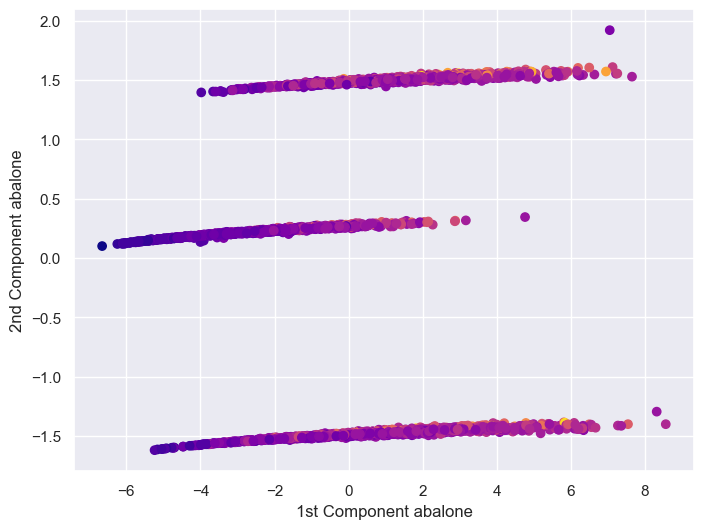

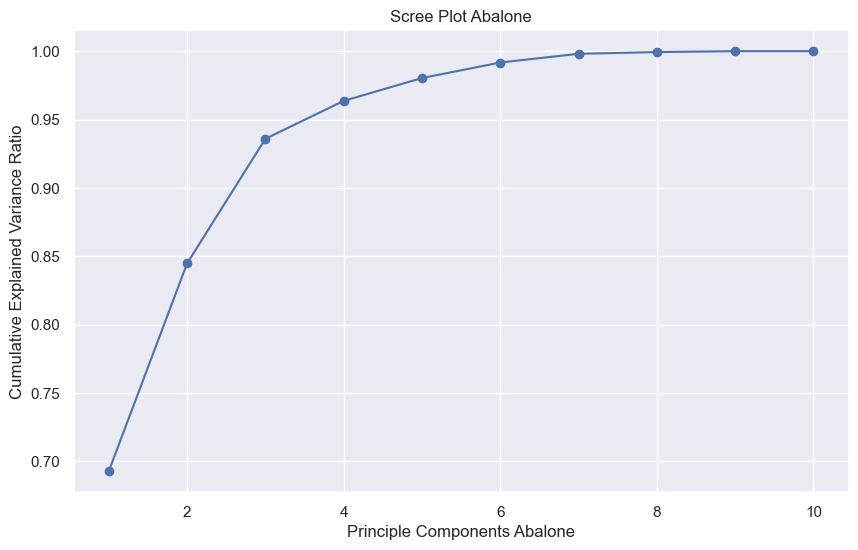

In [66]:
pca = PCA()
pca.fit(data_a_stats_features)
ab_pca = pca.transform(data_a_stats_features)
print(ab_pca.shape)

plt.figure(figsize=(8,6))
plt.scatter(ab_pca[:,0], ab_pca[:,1], c = data_a_stats['Rings'], cmap='plasma')
plt.xlabel("1st Component abalone")
plt.ylabel("2nd Component abalone")

# The figure shows the variance explained by the first and second primary components.

# Calculate cumulative explained variance ratio
a_cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), a_cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot Abalone')
plt.xlabel('Principal Components Abalone')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

          PC-1      PC-2
0    -1.442862 -1.523664
1    -2.971084 -1.549403
2    -0.165524  1.484398
3    -1.207120 -1.509323
4    -4.020928  0.184969
...        ...       ...
4172  1.055851  1.505825
4173  0.911746 -1.483151
4174  2.290560 -1.443713
4175  1.859454  1.501851
4176  4.881971 -1.440547

[4177 rows x 2 columns]


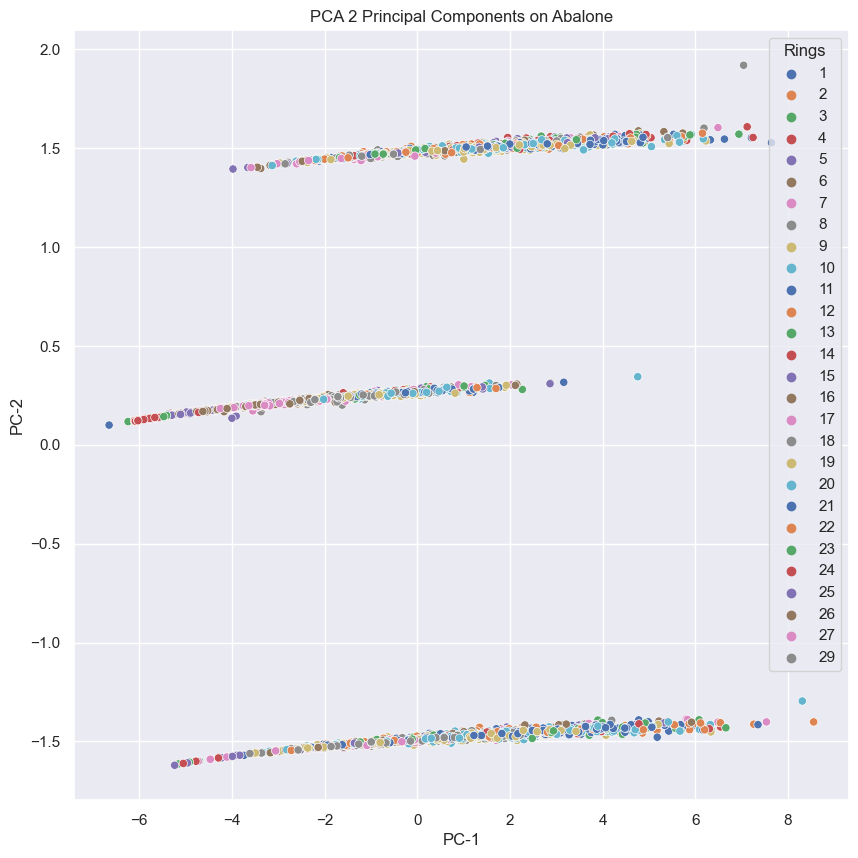

In [76]:
# To show the plot of first two principal components for Abalone dataset.

pca=PCA(n_components=2)
abalone_pca=pca.fit_transform(data_a_stats_features)
abalone_pca=pd.DataFrame(data=abalone_pca,columns=['PC-1','PC-2'])
print(abalone_pca)

seaborn.set(rc={'figure.figsize':(10,10)})
dataframe_abalone_pca2=pd.DataFrame(data=abalone_pca,columns=['PC-1','PC-2'])
dataframe_abalone_pca2['Rings']=data_abalone['Rings']
palette=seaborn.color_palette(n_colors=len(data_a_class.unique()))
seaborn.scatterplot(data=dataframe_abalone_pca2,x='PC-1',y='PC-2',hue='Rings',palette=palette)
plt.title('PCA 2 Principal Components on Abalone')
plt.show()

(6497, 13)


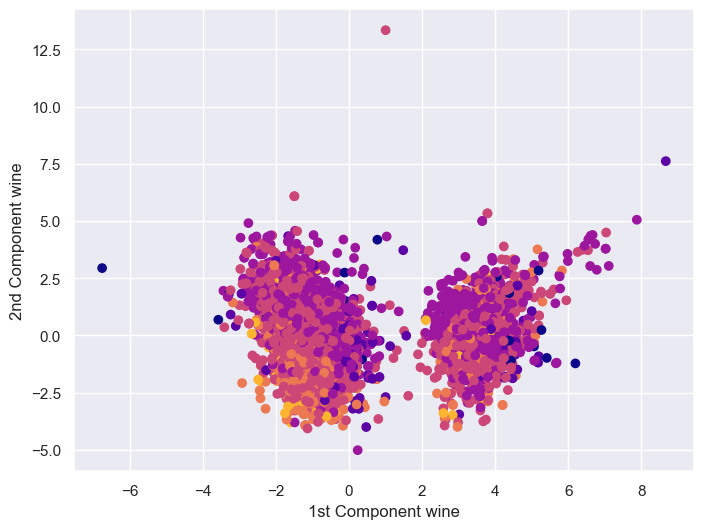

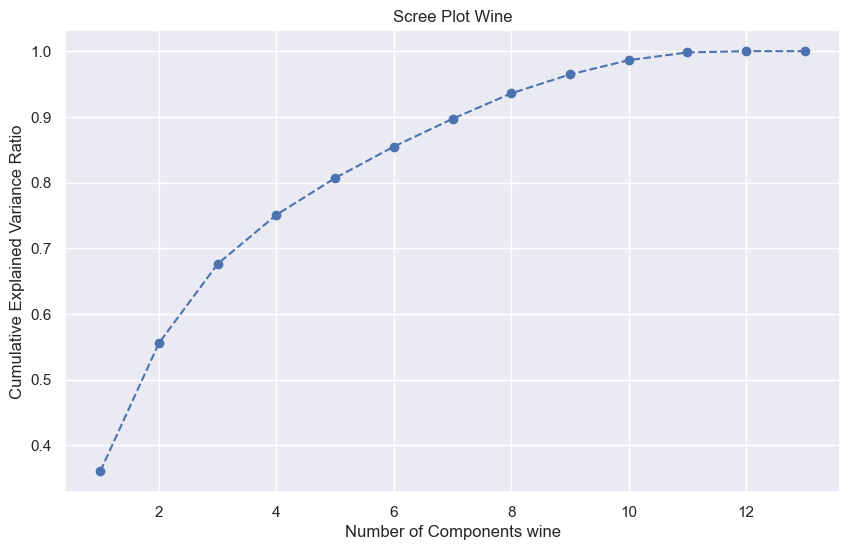

In [35]:
pca=PCA()
pca.fit(data_wq_stats_features)
wq_pca=pca.transform(data_wq_stats_features)
print(wq_pca.shape)

plt.figure(figsize=(8,6))
plt.scatter(wq_pca[:,0], wq_pca[:,1], c = data_wq_stats['quality'], cmap='plasma')
plt.xlabel("1st Component wine")
plt.ylabel("2nd Component wine")

wq_cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), wq_cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot Wine')
plt.xlabel('Number of Components wine')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

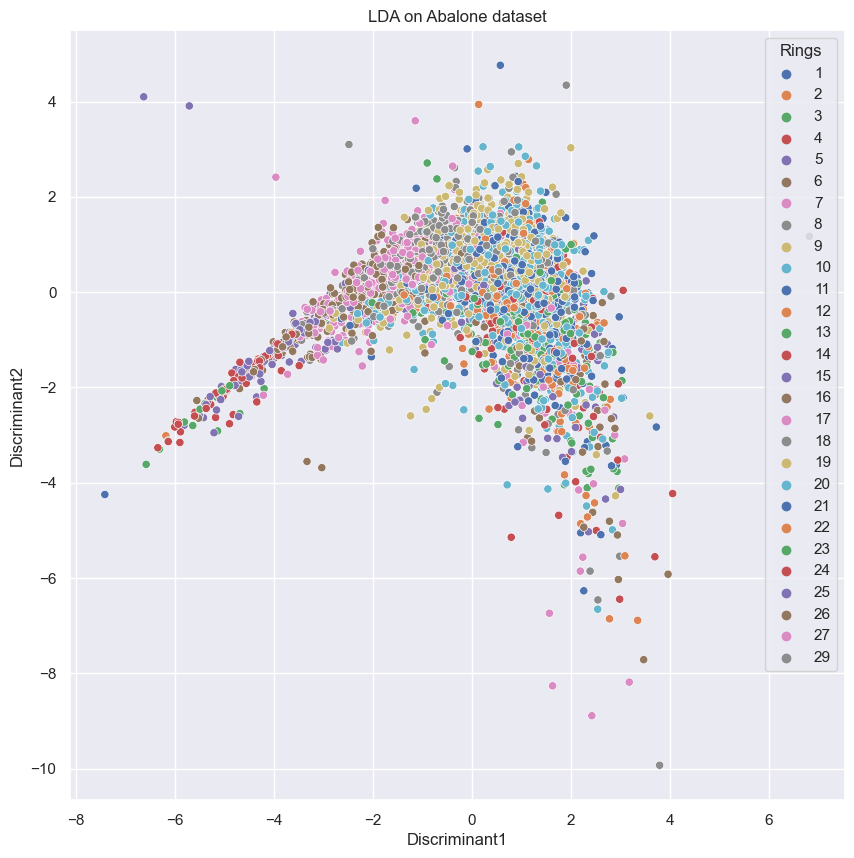

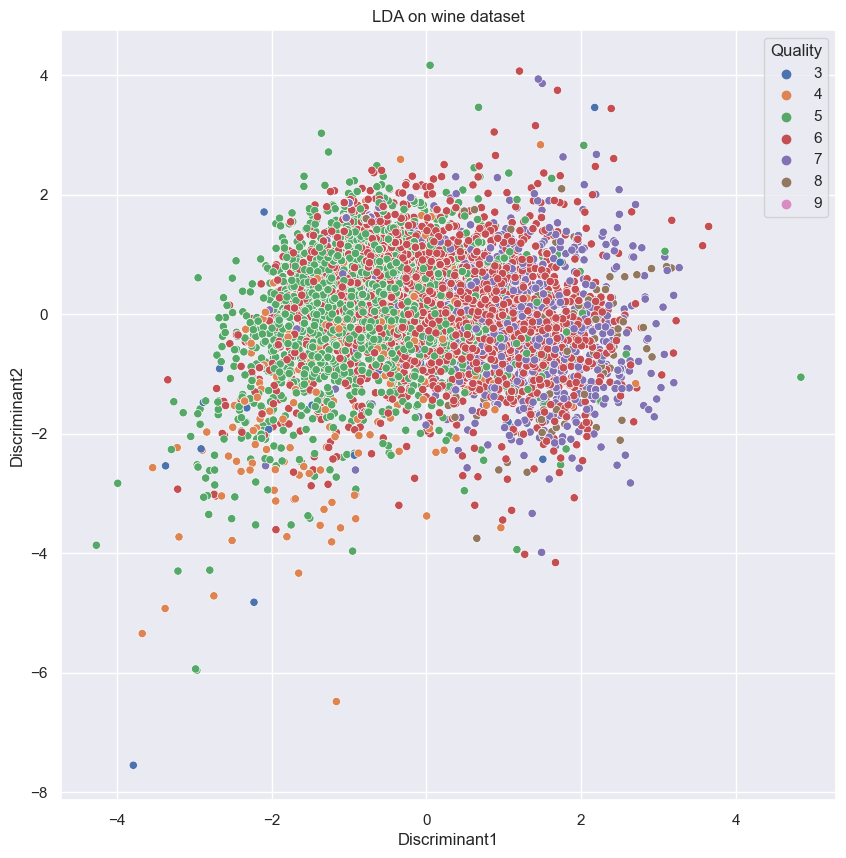

In [48]:
#To Show a plot of the first 2 Discriminants.

lda= LinearDiscriminantAnalysis(n_components=2)
ab_lda=lda.fit_transform(data_a_stats_features,data_a_class)

seaborn.set(rc={'figure.figsize':(10,10)})
dataframe_ab_lda=pd.DataFrame(data=ab_lda,columns=['Discriminant1','Discriminant2'])
dataframe_ab_lda['Rings']=data_abalone['Rings']
#print(dataframe_ab_lda)
palette=seaborn.color_palette(n_colors=len(data_a_class.unique()))
seaborn.scatterplot(data=dataframe_ab_lda,x='Discriminant1',y='Discriminant2',hue='Rings',palette=palette)
plt.title('LDA on Abalone dataset')
plt.show()




lda= LinearDiscriminantAnalysis(n_components=2)
wq_lda=lda.fit_transform(data_wq_stats_features,data_wq_class)

seaborn.set(rc={'figure.figsize':(10,10)})
dataframe_wq_lda=pd.DataFrame(data=wq_lda,columns=['Discriminant1','Discriminant2'])
dataframe_wq_lda['Quality']=data_wq['quality']
#print(dataframe_wq_lda)
palette=seaborn.color_palette(n_colors=len(data_wq_class.unique()))
seaborn.scatterplot(data=dataframe_wq_lda,x='Discriminant1',y='Discriminant2',hue='Quality',palette=palette)
plt.title('LDA on wine dataset')
plt.show()

Best Accuracy is 0.24760765550239233  at K =  76 and no. of PCA components is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.2535885167464115  at K =  88 and no. of PCA components is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.291866028708134  at K =  97 and no. of PCA components is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.29545454545454547  at K =  77 and no. of PCA components is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.3038277511961722  at K =  92 and no. of PCA components is equal to  6  at KNN distance_metrics=Euclidean
Best Accuracy is 0.3050239234449761  at K =  88 and no. of PCA components is equal to  7  at KNN distance_metrics=Euclidean
Best Accuracy is 0.3062200956937799  at K =  92 and no. of PCA components is equal to  8  at KNN distance_metrics=Euclidean
Best Accuracy is 0.30861244019138756  at K =  81 and no. of PCA components is equal to  9  at KNN distance_metrics=Euclidean
Best A

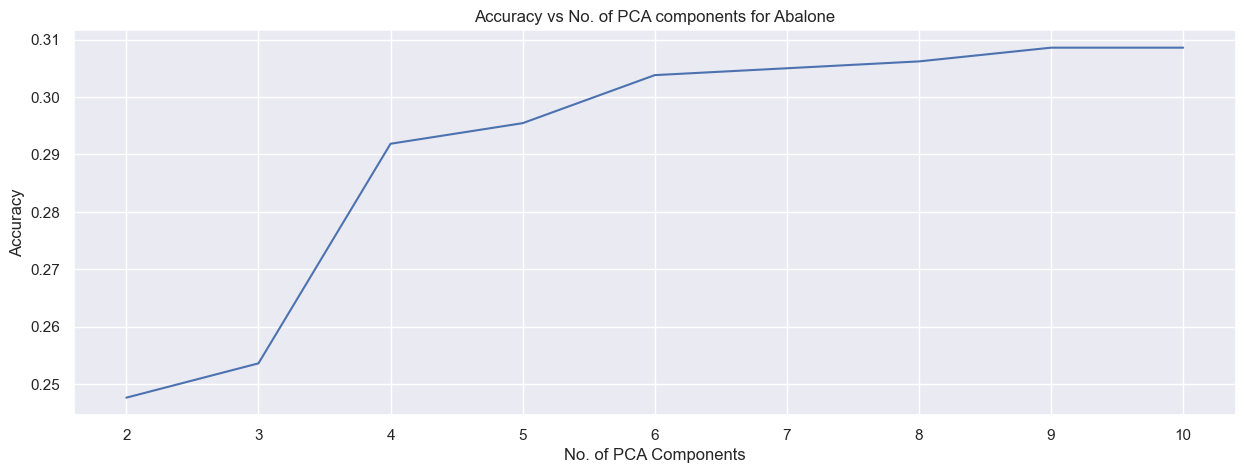

In [54]:
# Experimentally find the best reduced dimensionality for the Abalone dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
pc=[]
p=range(2,11)

for i in p:
    pca=PCA(n_components=i)
    pca.fit(data_a_stats_features)
    ab_pca=pca.transform(data_a_stats_features)
    x_train, x_test, y_train, y_test = train_test_split(ab_pca,data_a_class,test_size=0.2,random_state = 30)
    principal_component=i
    k=range(1,100)
    accuracy_best=0


    for j in k:
        neighbor = neighbors.KNeighborsClassifier(n_neighbors= j ,weights='distance',algorithm='auto',p=2,metric='minkowski')
        neighbor.fit(x_train,y_train)
        predicted_class = neighbor.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,predicted_class)
        
        if accuracy_best<accuracy:
            accuracy_best=accuracy
            k_optimum=j
            
        a1=accuracy_best
        b2=k_optimum
    ab.append(a1)
    pc.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of PCA components is equal to ',i,' at KNN distance_metrics=Euclidean')

seaborn.set(rc={'figure.figsize':(15,5)})
plt.plot(pc,ab)
plt.xlabel('No. of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of PCA components for Abalone')
plt.show()

Best Accuracy is 0.62  at K =  95 and no. of PCA components is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.65  at K =  70 and no. of PCA components is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6615384615384615  at K =  55 and no. of PCA components is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6638461538461539  at K =  30 and no. of PCA components is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6823076923076923  at K =  87 and no. of PCA components is equal to  6  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6792307692307692  at K =  81 and no. of PCA components is equal to  7  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6853846153846154  at K =  32 and no. of PCA components is equal to  8  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6815384615384615  at K =  42 and no. of PCA components is equal to  9  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6807692307692308 

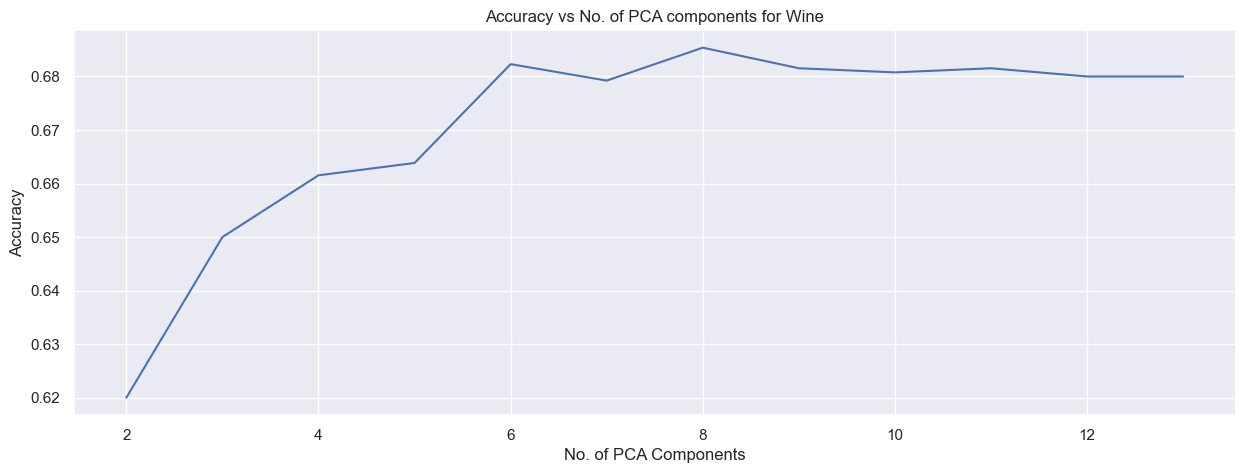

In [51]:
# Experimentally find the best reduced dimensionality for the Wine dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
pc=[]
p=range(2,14)

for i in p:
    pca=PCA(n_components=i)
    pca.fit(data_wq_stats_features)
    wq_pca=pca.transform(data_wq_stats_features)
    x_train, x_test, y_train, y_test = train_test_split(wq_pca,data_wq_class,test_size=0.2,random_state = 30)
    principal_component=i
    k=range(1,100)
    accuracy_best=0


    for j in k:
        neighbor = neighbors.KNeighborsClassifier(n_neighbors= j ,weights='distance',algorithm='auto',p=2,metric='minkowski')
        neighbor.fit(x_train,y_train)
        predicted_class = neighbor.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,predicted_class)
        
        if accuracy_best<accuracy:
            accuracy_best=accuracy
            k_optimum=j
            
        a1=accuracy_best
        b2=k_optimum
    ab.append(a1)
    pc.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of PCA components is equal to ',i,' at KNN distance_metrics=Euclidean')

seaborn.set(rc={'figure.figsize':(15,5)})
plt.plot(pc,ab)
plt.xlabel('No. of PCA Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No. of PCA components for Wine')
plt.show()

Best Accuracy is 0.26674641148325356  at K =  95 and no. of Discriminants is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.28588516746411485  at K =  34 and no. of Discriminants is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.28588516746411485  at K =  36 and no. of Discriminants is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.27870813397129185  at K =  90 and no. of Discriminants is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.284688995215311  at K =  56 and no. of Discriminants is equal to  6  at KNN distance_metrics=Euclidean
Best Accuracy is 0.28827751196172247  at K =  27 and no. of Discriminants is equal to  7  at KNN distance_metrics=Euclidean
Best Accuracy is 0.284688995215311  at K =  75 and no. of Discriminants is equal to  8  at KNN distance_metrics=Euclidean
Best Accuracy is 0.27631578947368424  at K =  72 and no. of Discriminants is equal to  9  at KNN distance_metrics=Euclidean
Best Accurac

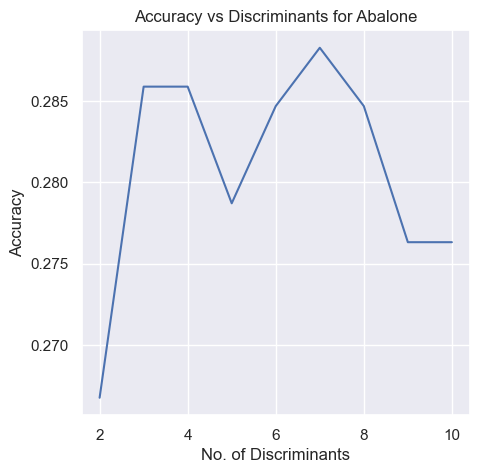

In [59]:
# Experimentally find the best reduced dimensionality for the Abalone dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
ld=[]
l=range(2,11)
#In LDA n_components cannot be greater than the minimum of features or no. of classes - 1
for i in l:
    lda=LinearDiscriminantAnalysis(n_components=i)
    ab_lda=lda.fit_transform(data_a_stats_features,data_a_class)
    x_train, x_test, y_train, y_test = train_test_split(ab_lda,data_a_class,test_size=0.2,random_state = 30)
    discriminant=i
    k=range(1,100)
    accuracy_best=0

    for j in k:
        neighbor = neighbors.KNeighborsClassifier(n_neighbors= j ,weights='distance',algorithm='auto',p=2,metric='minkowski')
        neighbor.fit(x_train,y_train)
        predicted_class = neighbor.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,predicted_class)
        
        if accuracy_best<accuracy:
            accuracy_best=accuracy
            k_optimum=j
            
        a1=accuracy_best
        b2=k_optimum
    ab.append(a1)
    ld.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of Discriminants is equal to ',i,' at KNN distance_metrics=Euclidean')


seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(ld,ab)
plt.xlabel('No. of Discriminants')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Discriminants for Abalone')
plt.show()

Best Accuracy is 0.6530769230769231  at K =  73 and no. of Discriminants is equal to  2  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6692307692307692  at K =  64 and no. of Discriminants is equal to  3  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6715384615384615  at K =  70 and no. of Discriminants is equal to  4  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6661538461538462  at K =  86 and no. of Discriminants is equal to  5  at KNN distance_metrics=Euclidean
Best Accuracy is 0.6715384615384615  at K =  55 and no. of Discriminants is equal to  6  at KNN distance_metrics=Euclidean


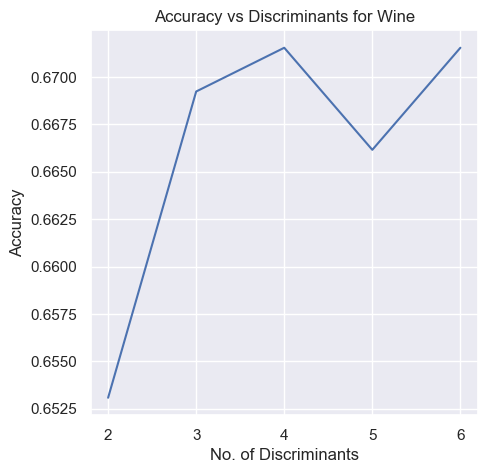

In [56]:
# Experimentally find the best reduced dimensionality for the Wine dataset with respect to how it impacts the accuracy of a classifier.
ab=[]
ld=[]
l=range(2,7)
#In LDA n_components cannot be greater than the minimum of features or no. of classes - 1
for i in l:
    lda=LinearDiscriminantAnalysis(n_components=i)
    wq_lda=lda.fit_transform(data_wq_stats_features,data_wq_class)
    x_train, x_test, y_train, y_test = train_test_split(wq_lda,data_wq_class,test_size=0.2,random_state = 30)
    discriminant=i
    k=range(1,100)
    accuracy_best=0

    for j in k:
        neighbor = neighbors.KNeighborsClassifier(n_neighbors= j ,weights='distance',algorithm='auto',p=2,metric='minkowski')
        neighbor.fit(x_train,y_train)
        predicted_class = neighbor.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,predicted_class)
        
        if accuracy_best<accuracy:
            accuracy_best=accuracy
            k_optimum=j
            
        a1=accuracy_best
        b2=k_optimum
    ab.append(a1)
    ld.append(i)
    print('Best Accuracy is',a1,' at K = ',b2, 'and no. of Discriminants is equal to ',i,' at KNN distance_metrics=Euclidean')


seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(ld,ab)
plt.xlabel('No. of Discriminants')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Discriminants for Wine')
plt.show()

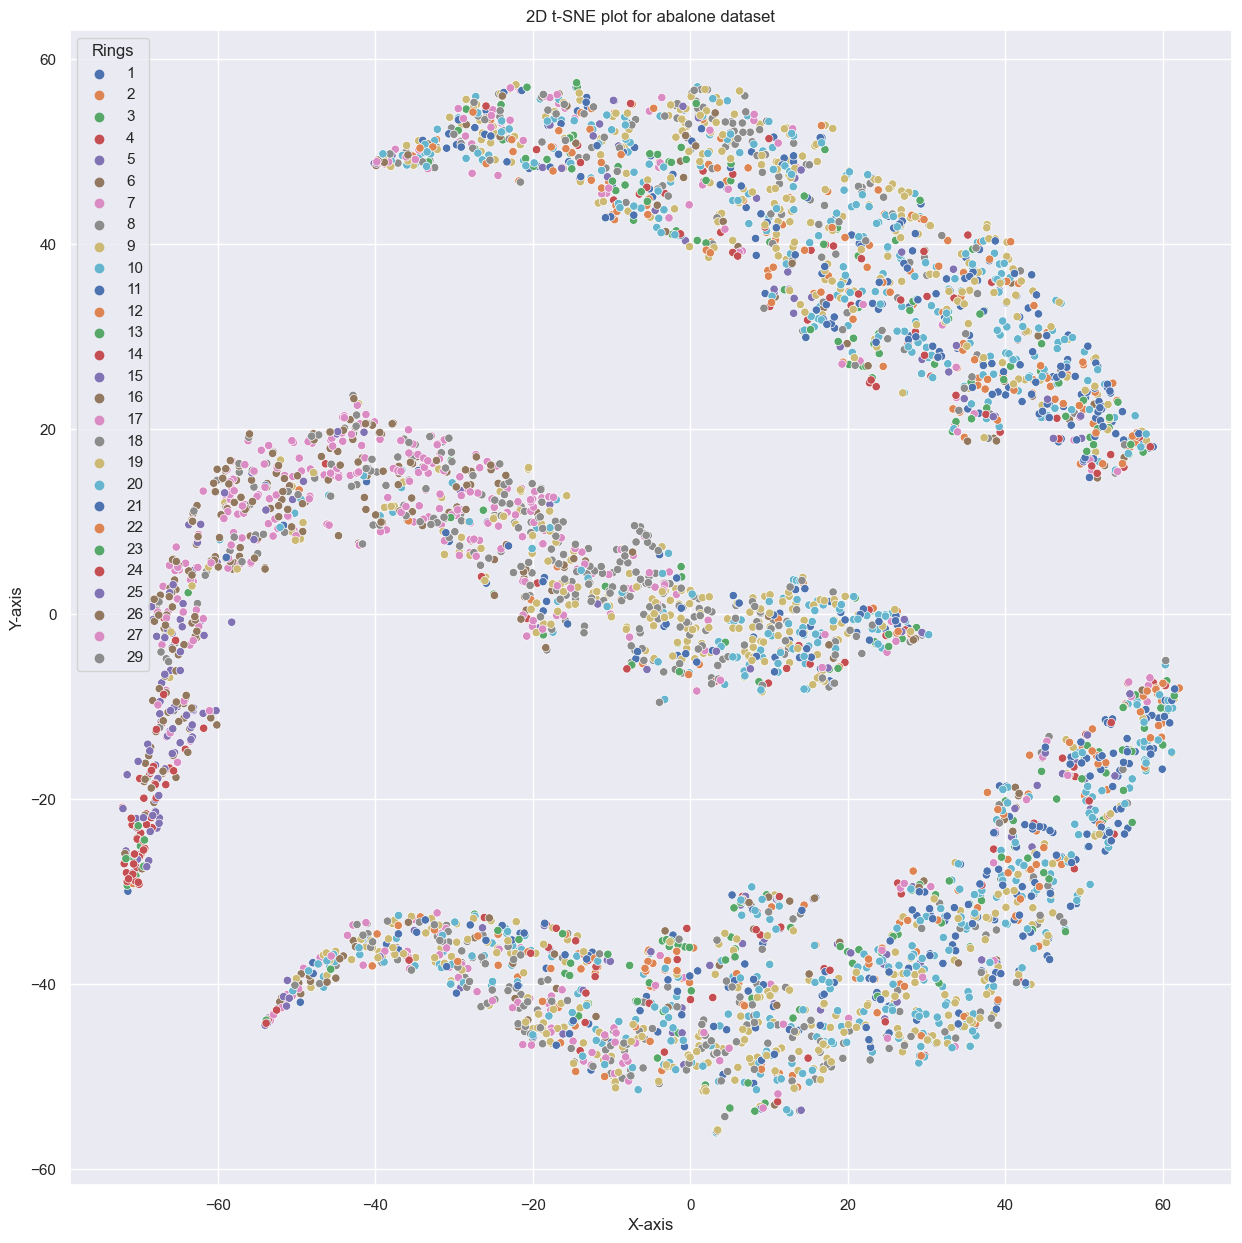

In [61]:
#t-SNE for Abalone dataset.

tsne=TSNE(n_components=2,random_state=18)
abalone_tsne=tsne.fit_transform(data_a_stats_features)

seaborn.set(rc={'figure.figsize':(15,15)})
dataframe_abalone_tsne=pd.DataFrame(data=abalone_tsne,columns=['X-axis','Y-axis'])
dataframe_abalone_tsne['Rings']=data_abalone['Rings']
palette=seaborn.color_palette(n_colors=len(data_a_class.unique()))
seaborn.scatterplot(data=dataframe_abalone_tsne,x='X-axis',y='Y-axis',hue='Rings',palette=palette)
plt.title('2D t-SNE plot for abalone dataset')
plt.show()

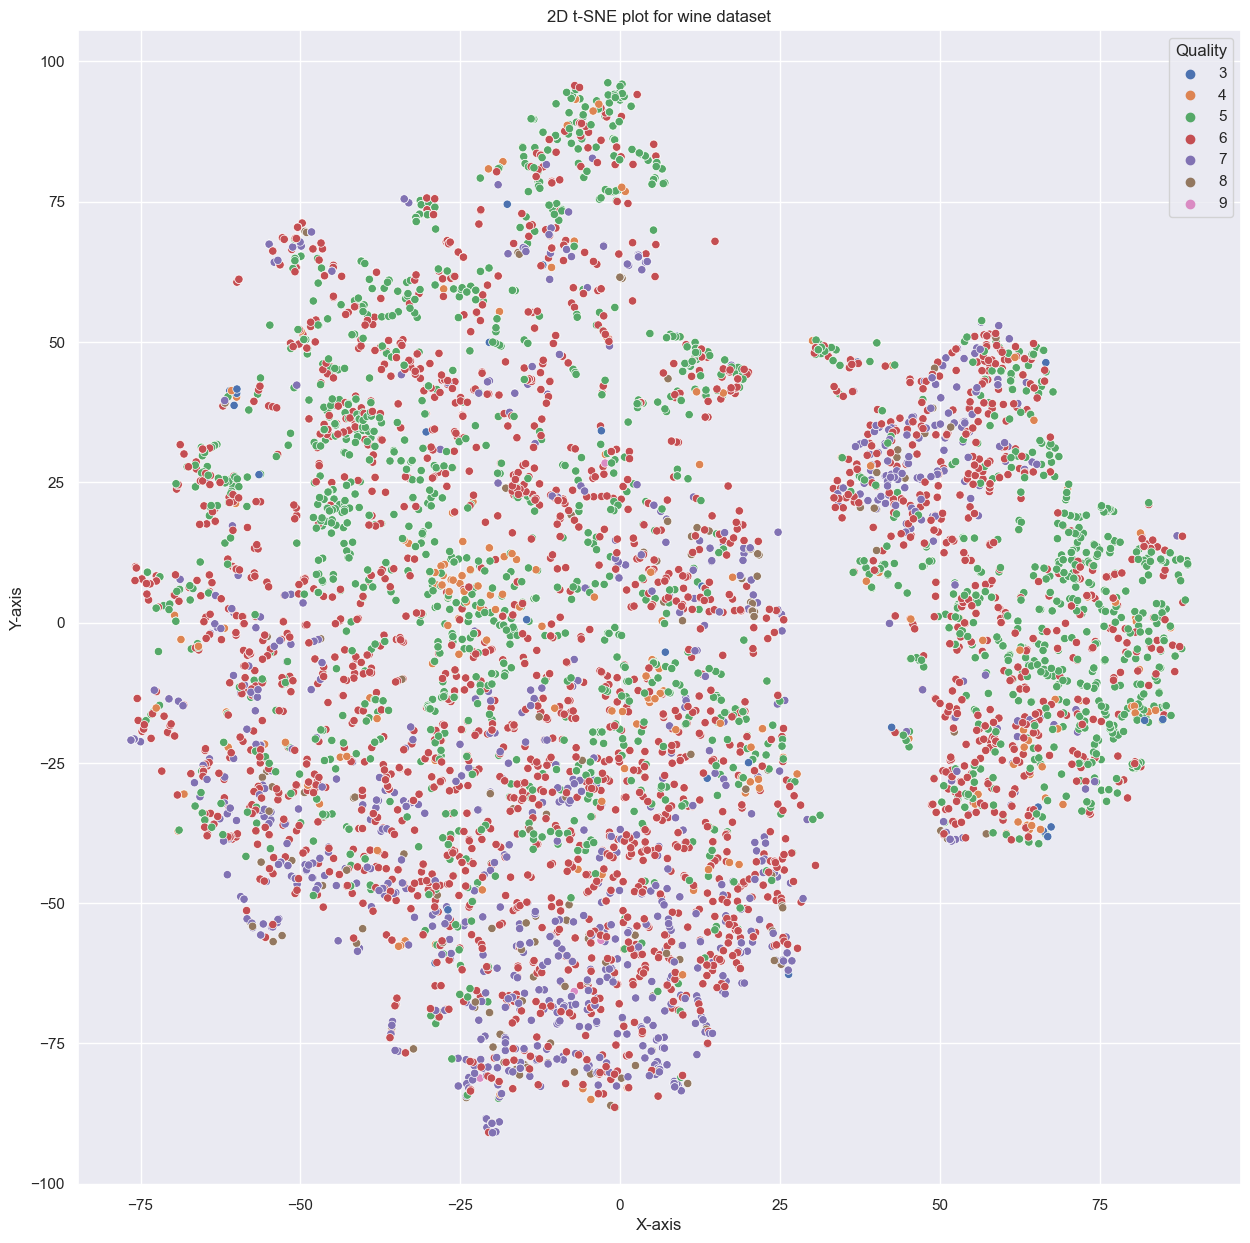

In [62]:
#t-SNE for Wine dataset

tsne=TSNE(n_components=2,random_state=18)
wq_tsne=tsne.fit_transform(data_wq_stats_features)

seaborn.set(rc={'figure.figsize':(15,15)})
dataframe_wq_tsne=pd.DataFrame(data=wq_tsne,columns=['X-axis','Y-axis'])
dataframe_wq_tsne['Quality']=data_wq['quality']
palette=seaborn.color_palette(n_colors=len(data_wq_class.unique()))
seaborn.scatterplot(data=dataframe_wq_tsne,x='X-axis',y='Y-axis',hue='Quality',palette=palette)
plt.title('2D t-SNE plot for wine dataset')
plt.show()

In [82]:
# Extracting dataset of wine and abalone by using appropriate value of n_components for PCA and LDA
# Abalone dataset PCA using 2 components
pca=PCA(n_components=2)
data_abalone_pca=pca.fit_transform(data_a_stats_features)
data_abalone_pca=pd.DataFrame(data=data_abalone_pca,columns=['PC1','PC2'])
print(data_abalone_pca)

           PC1       PC2
0    -1.442862 -1.523664
1    -2.971084 -1.549403
2    -0.165524  1.484398
3    -1.207120 -1.509323
4    -4.020928  0.184969
...        ...       ...
4172  1.055851  1.505825
4173  0.911746 -1.483151
4174  2.290560 -1.443713
4175  1.859454  1.501851
4176  4.881971 -1.440547

[4177 rows x 2 columns]


In [84]:
# Wine dataset PCA using 8 components.
pca=PCA(n_components=8)
data_wine_pca=pca.fit_transform(data_wq_stats_features)
data_wine_pca=pd.DataFrame(data=data_wine_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
print(data_wine_pca)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     4.143247 -0.298967 -2.589950 -0.825496 -0.114457 -0.258703 -0.327973   
1     4.113458  0.401221 -1.903200 -0.801592  1.271549  1.606666  0.461548   
2     4.082748  0.168731 -1.604212 -0.831736  0.778779  0.769209  0.369268   
3     3.055646  1.730397  2.633284 -0.269645 -0.721824 -0.342966 -1.319433   
4     4.143247 -0.298967 -2.589950 -0.825496 -0.114457 -0.258703 -0.327973   
...        ...       ...       ...       ...       ...       ...       ...   
6492 -0.814738 -1.929363  0.204508  0.184769  0.083394 -0.683750  0.163133   
6493 -1.808721  0.975283 -0.509251  0.198971  0.392550  0.435025 -0.488118   
6494 -1.098608 -0.595539  0.078301 -0.950136  1.306240 -0.478680  0.423863   
6495 -1.209026 -3.427962  0.049863 -0.039538 -0.254911 -0.075935 -0.281888   
6496 -1.433859 -2.689611  0.638846 -0.427979 -0.133994 -0.606802 -0.719088   

           PC8  
0    -0.444284  
1    -0.442223  
2    -0.4045

In [85]:
# Abalone dataset LDA using 6 components
lda= LinearDiscriminantAnalysis(n_components=6)
data_abalone_lda=lda.fit_transform(data_a_stats_features,data_a_class)
data_abalone_lda=pd.DataFrame(data=data_abalone_lda,columns=['Discriminant1','Discriminant2','Discriminant3','Discriminant4','Discriminant5','Discriminant6'])
print(data_abalone_lda)

      Discriminant1  Discriminant2  Discriminant3  Discriminant4  \
0         -0.407959       0.230925      -0.125718      -0.184760   
1         -1.837047      -0.361837      -0.539940      -0.130769   
2          0.960864       0.202509       0.677704      -0.514244   
3         -0.274973      -0.096006      -0.167865      -0.646905   
4         -2.925191      -0.523997       0.269784      -0.293488   
...             ...            ...            ...            ...   
4172       1.021066       0.575918      -0.472871      -0.834160   
4173       0.683456       0.905941      -0.247643       0.280670   
4174       1.163419       0.415442      -0.679722      -0.903044   
4175       0.947552       1.470735      -1.041671       0.602505   
4176       0.857714      -0.327288      -1.915132       0.742774   

      Discriminant5  Discriminant6  
0         -0.619881       0.893590  
1         -0.870445       1.668998  
2         -0.205133       1.077944  
3         -1.288331       0.646349 

In [86]:
# Wine dataset LDA using 6 components
lda= LinearDiscriminantAnalysis(n_components=6)
data_wine_lda=lda.fit_transform(data_wq_stats_features,data_wq_class)
data_wine_lda=pd.DataFrame(data=data_wine_lda,columns=['Discriminant1','Discriminant2','Discriminant3','Discriminant4','Discriminant5','Discriminant6'])
print(data_wine_lda)

      Discriminant1  Discriminant2  Discriminant3  Discriminant4  \
0         -2.068161      -0.907126      -0.256553      -0.511175   
1         -2.231762      -1.487823       1.115445       0.453801   
2         -1.947723      -0.928774       0.246145       0.361122   
3         -0.151859       1.303867       0.699511       0.619895   
4         -2.068161      -0.907126      -0.256553      -0.511175   
...             ...            ...            ...            ...   
6492       0.864800      -0.235627      -1.017403      -0.206414   
6493      -0.552261       0.331848       1.142264      -0.081371   
6494      -1.087462       0.453927      -1.539586      -0.240565   
6495       1.652942      -0.837409      -0.354420       0.912104   
6496       1.076777      -0.255827      -0.509501       0.753319   

      Discriminant5  Discriminant6  
0         -0.640538      -0.447942  
1         -0.036816      -2.531810  
2         -0.247225      -1.864112  
3         -2.809783       1.257367 

In [139]:
compare_table = [['Dataset', 'Metric', 'Multinomial NB', 'Complement NB', 'KNN']]
# compare_table

In [140]:
# Naive Bayes Classifier.

# 1. For Abalone Original dataset.

scaler = MinMaxScaler()
data_a_stats_features_scaler = scaler.fit_transform(data_a_stats_features)
x_train, x_test, y_train, y_test = train_test_split(data_a_stats_features_scaler, data_a_class, test_size = 0.2, random_state = 18)

#Multinomial Naive Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier1,x_train,y_train,cv=5,scoring='accuracy')
accuracy_mnb=accuracy_scores.mean()

#Complement Naive Bayes Classifier
nb_classifier2=ComplementNB()
nb_classifier2.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier2,x_train,y_train,cv=5,scoring='accuracy')
accuracy_cnb=accuracy_scores.mean()

#KNN
k=range(1,100)
accuracy_knn=0

for i in k:
    classifier3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='auto',p=2,metric='minkowski')
    classifier3.fit(x_train,y_train)
    predicted_class = classifier3.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,predicted_class)
        
    if accuracy_knn<accuracy:
        accuracy_knn=accuracy
        k_optimum=i
            
    a1=accuracy_knn
    b2=k_optimum
# ab.append(a1)

print('Accuracy Scores for Abalone Original dataset:')
print('Multinomial Naive Bayes: ',accuracy_mnb)
print('Complement Naive Bayes: ',accuracy_cnb)
print('K-nearest Neighbor: ',a1, 'at K =' ,b2)

if a1>accuracy_mnb and a1>accuracy_cnb:
    print('KNN has the highest accuracy')
else:
    if accuracy_mnb>accuracy_cnb:
        print('Multinomial Naive Bayes has the highest accuracy.')
    else:
        print('Complement Naive Bayes has the highest accuracy.')

AOD = ['Abalone_Original', 'Accuracy', accuracy_mnb, accuracy_cnb, a1]
compare_table.append(AOD)

Accuracy Scores for Abalone Original dataset:
Multinomial Naive Bayes:  0.21940289823939563
Complement Naive Bayes:  0.18767532200173642
K-nearest Neighbor:  0.2679425837320574 at K = 42
KNN has the highest accuracy


In [141]:
# 2. For Abalone PCA dataset.

scaler = MinMaxScaler()
data_abalone_pca_scaler = scaler.fit_transform(data_abalone_pca)
x_train, x_test, y_train, y_test = train_test_split(data_abalone_pca_scaler, data_a_class, test_size = 0.2, random_state = 18)

#Multinomial Naive Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier1,x_train,y_train,cv=5,scoring='accuracy')
accuracy_mnb=accuracy_scores.mean()

#Complement Naive Bayes Classifier
nb_classifier2=ComplementNB()
nb_classifier2.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier2,x_train,y_train,cv=5,scoring='accuracy')
accuracy_cnb=accuracy_scores.mean()

#KNN
k=range(1,100)
accuracy_knn=0

for i in k:
    classifier3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='auto',p=2,metric='minkowski')
    classifier3.fit(x_train,y_train)
    predicted_class = classifier3.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,predicted_class)
        
    if accuracy_knn<accuracy:
        accuracy_knn=accuracy
        k_optimum=i
            
    a1=accuracy_knn
    b2=k_optimum
# ab.append(a1)

print('Accuracy Scores for Abalone PCA dataset:')
print('Multinomial Naive Bayes: ',accuracy_mnb)
print('Complement Naive Bayes: ',accuracy_cnb)
print('K-nearest Neighbor: ',a1, 'at K =' ,b2)

if a1>accuracy_mnb and a1>accuracy_cnb:
    print('KNN has the highest accuracy')
else:
    if accuracy_mnb>accuracy_cnb:
        print('Multinomial Naive Bayes has the highest accuracy.')
    else:
        print('Complement Naive Bayes has the highest accuracy.')

APD = ['Abalone_PCA', 'Accuracy', accuracy_mnb, accuracy_cnb, a1]
compare_table.append(APD)

Accuracy Scores for Abalone PCA dataset:
Multinomial Naive Bayes:  0.16402262739095802
Complement Naive Bayes:  0.12092899402987747
K-nearest Neighbor:  0.24641148325358853 at K = 39
KNN has the highest accuracy


In [142]:
# 3. For Abalone LDA dataset.

scaler = MinMaxScaler()
data_abalone_lda_scaler = scaler.fit_transform(data_abalone_lda)
x_train, x_test, y_train, y_test = train_test_split(data_abalone_lda_scaler, data_a_class, test_size = 0.2, random_state = 18)

#Multinomial Naive Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier1,x_train,y_train,cv=5,scoring='accuracy')
accuracy_mnb=accuracy_scores.mean()

#Complement Naive Bayes Classifier
nb_classifier2=ComplementNB()
nb_classifier2.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier2,x_train,y_train,cv=5,scoring='accuracy')
accuracy_cnb=accuracy_scores.mean()

#KNN
k=range(1,100)
accuracy_knn=0

for i in k:
    classifier3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='auto',p=2,metric='minkowski')
    classifier3.fit(x_train,y_train)
    predicted_class = classifier3.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,predicted_class)
        
    if accuracy_knn<accuracy:
        accuracy_knn=accuracy
        k_optimum=i
            
    a1=accuracy_knn
    b2=k_optimum
# ab.append(a1)

print('Accuracy Scores for Abalone LDA dataset:')
print('Multinomial Naive Bayes: ',accuracy_mnb)
print('Complement Naive Bayes: ',accuracy_cnb)
print('K-nearest Neighbor: ',a1, 'at K =' ,b2)

if a1>accuracy_mnb and a1>accuracy_cnb:
    print('KNN has the highest accuracy')
else:
    if accuracy_mnb>accuracy_cnb:
        print('Multinomial Naive Bayes has the highest accuracy.')
    else:
        print('Complement Naive Bayes has the highest accuracy.')

ALD = ['Abalone_LDA', 'Accuracy', accuracy_mnb, accuracy_cnb, a1]
compare_table.append(ALD)

Accuracy Scores for Abalone LDA dataset:
Multinomial Naive Bayes:  0.16402262739095802
Complement Naive Bayes:  0.20443641864253553
K-nearest Neighbor:  0.27870813397129185 at K = 80
KNN has the highest accuracy


In [143]:
# 4. For Wine Original dataset.

scaler = MinMaxScaler()
data_wq_stats_features_scaler = scaler.fit_transform(data_wq_stats_features)
x_train, x_test, y_train, y_test = train_test_split(data_wq_stats_features_scaler, data_wq_class, test_size = 0.2, random_state = 18)

#Multinomial Naive Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier1,x_train,y_train,cv=5,scoring='accuracy')
accuracy_mnb=accuracy_scores.mean()

#Complement Naive Bayes Classifier
nb_classifier2=ComplementNB()
nb_classifier2.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier2,x_train,y_train,cv=5,scoring='accuracy')
accuracy_cnb=accuracy_scores.mean()

#KNN
k=range(1,100)
accuracy_knn=0

for i in k:
    classifier3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='auto',p=2,metric='minkowski')
    classifier3.fit(x_train,y_train)
    predicted_class = classifier3.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,predicted_class)
        
    if accuracy_knn<accuracy:
        accuracy_knn=accuracy
        k_optimum=i
            
    a1=accuracy_knn
    b2=k_optimum
# ab.append(a1)

print('Accuracy Scores for Wine Original dataset:')
print('Multinomial Naive Bayes: ',accuracy_mnb)
print('Complement Naive Bayes: ',accuracy_cnb)
print('K-nearest Neighbor: ',a1, 'at K =' ,b2)

if a1>accuracy_mnb and a1>accuracy_cnb:
    print('KNN has the highest accuracy')
else:
    if accuracy_mnb>accuracy_cnb:
        print('Multinomial Naive Bayes has the highest accuracy.')
    else:
        print('Complement Naive Bayes has the highest accuracy.')

WOD = ['Wine_Original', 'Accuracy', accuracy_mnb, accuracy_cnb, a1]
compare_table.append(WOD)

Accuracy Scores for Wine Original dataset:
Multinomial Naive Bayes:  0.45142037462056706
Complement Naive Bayes:  0.44449155993188716
K-nearest Neighbor:  0.6907692307692308 at K = 43
KNN has the highest accuracy


In [144]:
# 5. For Wine PCA dataset.

scaler = MinMaxScaler()
data_wine_pca_scaler = scaler.fit_transform(data_wine_pca)
x_train, x_test, y_train, y_test = train_test_split(data_wine_pca_scaler, data_wq_class, test_size = 0.2, random_state = 18)

#Multinomial Naive Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier1,x_train,y_train,cv=5,scoring='accuracy')
accuracy_mnb=accuracy_scores.mean()

#Complement Naive Bayes Classifier
nb_classifier2=ComplementNB()
nb_classifier2.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier2,x_train,y_train,cv=5,scoring='accuracy')
accuracy_cnb=accuracy_scores.mean()

#KNN
k=range(1,100)
accuracy_knn=0

for i in k:
    classifier3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='auto',p=2,metric='minkowski')
    classifier3.fit(x_train,y_train)
    predicted_class = classifier3.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,predicted_class)
        
    if accuracy_knn<accuracy:
        accuracy_knn=accuracy
        k_optimum=i
            
    a1=accuracy_knn
    b2=k_optimum
# ab.append(a1)

print('Accuracy Scores for Wine PCA dataset:')
print('Multinomial Naive Bayes: ',accuracy_mnb)
print('Complement Naive Bayes: ',accuracy_cnb)
print('K-nearest Neighbor: ',a1, 'at K =' ,b2)

if a1>accuracy_mnb and a1>accuracy_cnb:
    print('KNN has the highest accuracy')
else:
    if accuracy_mnb>accuracy_cnb:
        print('Multinomial Naive Bayes has the highest accuracy.')
    else:
        print('Complement Naive Bayes has the highest accuracy.')

WPD = ['Wine_PCA', 'Accuracy', accuracy_mnb, accuracy_cnb, a1]
compare_table.append(WPD)

Accuracy Scores for Wine PCA dataset:
Multinomial Naive Bayes:  0.4342892574220774
Complement Naive Bayes:  0.4415989857111128
K-nearest Neighbor:  0.69 at K = 51
KNN has the highest accuracy


In [145]:
# 6. For Wine LDA dataset.

scaler = MinMaxScaler()
data_wine_lda_scaler = scaler.fit_transform(data_wine_lda)
x_train, x_test, y_train, y_test = train_test_split(data_wine_lda_scaler, data_wq_class, test_size = 0.2, random_state = 18)

#Multinomial Naive Bayes Classifier
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier1,x_train,y_train,cv=5,scoring='accuracy')
accuracy_mnb=accuracy_scores.mean()

#Complement Naive Bayes Classifier
nb_classifier2=ComplementNB()
nb_classifier2.fit(x_train,y_train)

accuracy_scores=cross_val_score(nb_classifier2,x_train,y_train,cv=5,scoring='accuracy')
accuracy_cnb=accuracy_scores.mean()

#KNN
k=range(1,100)
accuracy_knn=0

for i in k:
    classifier3=neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='auto',p=2,metric='minkowski')
    classifier3.fit(x_train,y_train)
    predicted_class = classifier3.predict(x_test)
    accuracy = metrics.accuracy_score(y_test,predicted_class)
        
    if accuracy_knn<accuracy:
        accuracy_knn=accuracy
        k_optimum=i
            
    a1=accuracy_knn
    b2=k_optimum
# ab.append(a1)

print('Accuracy Scores for Wine LDA dataset:')
print('Multinomial Naive Bayes: ',accuracy_mnb)
print('Complement Naive Bayes: ',accuracy_cnb)
print('K-nearest Neighbor: ',a1, 'at K =' ,b2)

if a1>accuracy_mnb and a1>accuracy_cnb:
    print('KNN has the highest accuracy')
else:
    if accuracy_mnb>accuracy_cnb:
        print('Multinomial Naive Bayes has the highest accuracy.')
    else:
        print('Complement Naive Bayes has the highest accuracy.')

WLD = ['Wine_LDA', 'Accuracy', accuracy_mnb, accuracy_cnb, a1]
compare_table.append(WLD)

for row in compare_table:
    print(row)

Accuracy Scores for Wine LDA dataset:
Multinomial Naive Bayes:  0.4342892574220774
Complement Naive Bayes:  0.4294771229732731
K-nearest Neighbor:  0.683076923076923 at K = 25
KNN has the highest accuracy
['Dataset', 'Metric', 'Multinomial NB', 'Complement NB', 'KNN']
['Abalone_Original', 'Accuracy', 0.21940289823939563, 0.18767532200173642, 0.2679425837320574]
['Abalone_PCA', 'Accuracy', 0.16402262739095802, 0.12092899402987747, 0.24641148325358853]
['Abalone_LDA', 'Accuracy', 0.16402262739095802, 0.20443641864253553, 0.27870813397129185]
['Wine_Original', 'Accuracy', 0.45142037462056706, 0.44449155993188716, 0.6907692307692308]
['Wine_PCA', 'Accuracy', 0.4342892574220774, 0.4415989857111128, 0.69]
['Wine_LDA', 'Accuracy', 0.4342892574220774, 0.4294771229732731, 0.683076923076923]


In [146]:
import pandas as pd

data = [
    ['Dataset', 'Metric', 'Multinomial NB', 'Complement NB', 'KNN'],
    ['Abalone_Original', 'Accuracy', 0.21940289823939563, 0.18767532200173642, 0.2679425837320574],
    ['Abalone_PCA', 'Accuracy', 0.16402262739095802, 0.12092899402987747, 0.24641148325358853],
    ['Abalone_LDA', 'Accuracy', 0.16402262739095802, 0.20443641864253553, 0.27870813397129185],
    ['Wine_Original', 'Accuracy', 0.45142037462056706, 0.44449155993188716, 0.6907692307692308],
    ['Wine_PCA', 'Accuracy', 0.4342892574220774, 0.4415989857111128, 0.69],
    ['Wine_LDA', 'Accuracy', 0.4342892574220774, 0.4294771229732731, 0.683076923076923]
]

# Extracting headers and rows
headers = data[0]
rows = data[1:]

# Creating DataFrame
df = pd.DataFrame(rows, columns=headers)
print(df)

            Dataset    Metric  Multinomial NB  Complement NB       KNN
0  Abalone_Original  Accuracy        0.219403       0.187675  0.267943
1       Abalone_PCA  Accuracy        0.164023       0.120929  0.246411
2       Abalone_LDA  Accuracy        0.164023       0.204436  0.278708
3     Wine_Original  Accuracy        0.451420       0.444492  0.690769
4          Wine_PCA  Accuracy        0.434289       0.441599  0.690000
5          Wine_LDA  Accuracy        0.434289       0.429477  0.683077


In [ ]:
# Overall, it is observed that KNN has the highest accuracy and performs better that Multinomial Naive Bayes classifier and Complement Naive
# Bayes classifier.

Best Max-depth is  6
Best Accuracy is  0.2723870644361501


Text(0.5, 1.0, 'max_depth vs accuracy for Abalone-original dataset')

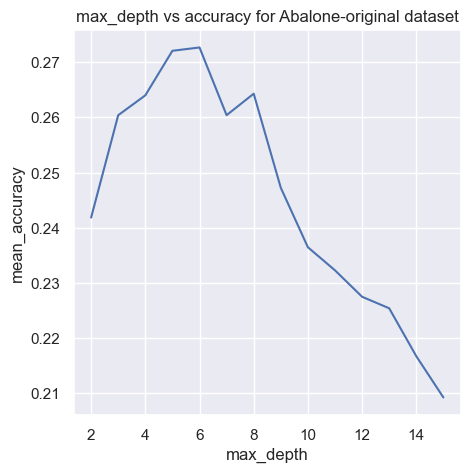

In [161]:
# Decision Tree Classifier:

# 1. Abalone Original Dataset
x_train, x_test, y_train, y_test = train_test_split(data_a_stats_features,data_a_class,test_size=0.2,random_state = 18)

parameter_grid={'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
AOD_classifier=DecisionTreeClassifier()

gs=GridSearchCV(AOD_classifier,parameter_grid,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
depth_optimum=gs.best_params_['max_depth']
accuracy_dt=gs.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_dt)

depth=range(2,16)
accuracy=[]
for i in depth:
    AOD_classifier=DecisionTreeClassifier(max_depth=i)
    accuracy_dectree=cross_val_score(AOD_classifier,x_train,y_train,cv=5)
    accuracy.append(accuracy_dectree.mean())
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('mean_accuracy')
plt.title('max_depth vs accuracy for Abalone-original dataset')

In [162]:
#Visualization for Abalone Original Dataset
AOD_classifier=DecisionTreeClassifier(max_depth=depth_optimum)
AOD_classifier.fit(x_train,y_train)
tree_text = export_text(AOD_classifier)
print(tree_text)

|--- feature_6 <= -0.68
|   |--- feature_6 <= -1.37
|   |   |--- feature_6 <= -1.56
|   |   |   |--- feature_4 <= -1.58
|   |   |   |   |--- feature_2 <= -2.80
|   |   |   |   |   |--- feature_0 <= -3.39
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  -3.39
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_2 >  -2.80
|   |   |   |   |   |--- feature_5 <= -1.62
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_5 >  -1.62
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- feature_4 >  -1.58
|   |   |   |   |--- feature_0 <= -2.34
|   |   |   |   |   |--- feature_6 <= -1.58
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_6 >  -1.58
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_0 >  -2.34
|   |   |   |   |   |--- feature_4 <= -1.45
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- feature_4 >  -1.45
|   |   |   |   |   |   |--- class: 5
|   |   |--- feature_6 >  -1

Best Max-depth is  3
Best Accuracy is  0.2610022108249868


Text(0.5, 1.0, 'max_depth vs accuracy for Abalone-PCA dataset')

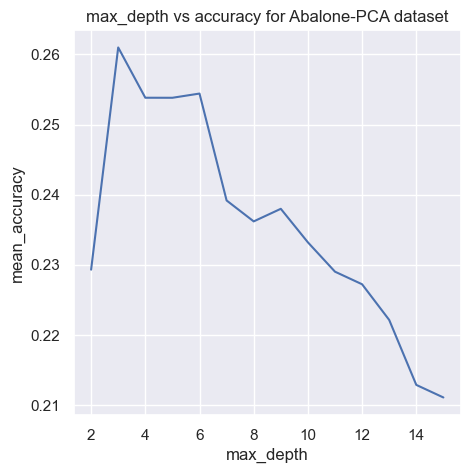

In [163]:
# 2. Abalone PCA Dataset
x_train, x_test, y_train, y_test = train_test_split(data_abalone_pca,data_a_class,test_size=0.2,random_state = 18)

parameter_grid={'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
APD_classifier=DecisionTreeClassifier()

gs=GridSearchCV(APD_classifier,parameter_grid,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
depth_optimum=gs.best_params_['max_depth']
accuracy_dt=gs.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_dt)

depth=range(2,16)
accuracy=[]
for i in depth:
    APD_classifier=DecisionTreeClassifier(max_depth=i)
    accuracy_dectree=cross_val_score(APD_classifier,x_train,y_train,cv=5)
    accuracy.append(accuracy_dectree.mean())
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('mean_accuracy')
plt.title('max_depth vs accuracy for Abalone-PCA dataset')

In [164]:
#Visualization for Abalone PCA Dataset
APD_classifier=DecisionTreeClassifier(max_depth=depth_optimum)
APD_classifier.fit(x_train,y_train)
tree_text = export_text(APD_classifier)
print(tree_text)

|--- feature_0 <= -2.04
|   |--- feature_0 <= -4.17
|   |   |--- feature_1 <= 0.16
|   |   |   |--- class: 4
|   |   |--- feature_1 >  0.16
|   |   |   |--- class: 6
|   |--- feature_0 >  -4.17
|   |   |--- feature_0 <= -2.80
|   |   |   |--- class: 7
|   |   |--- feature_0 >  -2.80
|   |   |   |--- class: 7
|--- feature_0 >  -2.04
|   |--- feature_0 <= 2.10
|   |   |--- feature_0 <= -0.66
|   |   |   |--- class: 8
|   |   |--- feature_0 >  -0.66
|   |   |   |--- class: 9
|   |--- feature_0 >  2.10
|   |   |--- feature_0 <= 3.85
|   |   |   |--- class: 10
|   |   |--- feature_0 >  3.85
|   |   |   |--- class: 11



Best Max-depth is  5
Best Accuracy is  0.26579800041173257


Text(0.5, 1.0, 'max_depth vs accuracy for Abalone-LDA dataset')

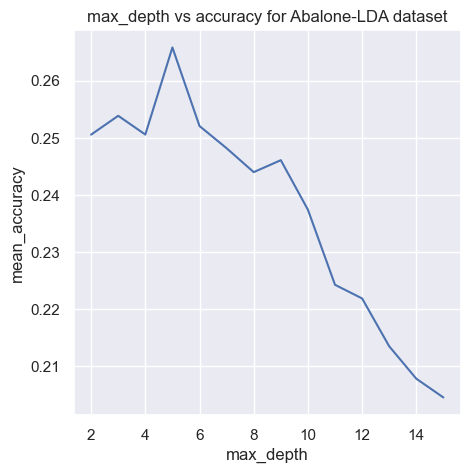

In [165]:
# 3. Abalone LDA Dataset
x_train, x_test, y_train, y_test = train_test_split(data_abalone_lda,data_a_class,test_size=0.2,random_state = 18)

parameter_grid={'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
ALD_classifier=DecisionTreeClassifier()

gs=GridSearchCV(ALD_classifier,parameter_grid,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
depth_optimum=gs.best_params_['max_depth']
accuracy_dt=gs.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_dt)

depth=range(2,16)
accuracy=[]
for i in depth:
    ALD_classifier=DecisionTreeClassifier(max_depth=i)
    accuracy_dectree=cross_val_score(ALD_classifier,x_train,y_train,cv=5)
    accuracy.append(accuracy_dectree.mean())
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('mean_accuracy')
plt.title('max_depth vs accuracy for Abalone-LDA dataset')

In [166]:
#Visualization for Abalone LDA Dataset
ALD_classifier=DecisionTreeClassifier(max_depth=depth_optimum)
ALD_classifier.fit(x_train,y_train)
tree_text = export_text(ALD_classifier)
print(tree_text)

|--- feature_0 <= -1.05
|   |--- feature_0 <= -3.38
|   |   |--- feature_0 <= -4.27
|   |   |   |--- feature_4 <= 0.21
|   |   |   |   |--- feature_1 <= -2.80
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_1 >  -2.80
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_4 >  0.21
|   |   |   |   |--- feature_4 <= 0.39
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_4 >  0.39
|   |   |   |   |   |--- class: 4
|   |   |--- feature_0 >  -4.27
|   |   |   |--- feature_2 <= -1.33
|   |   |   |   |--- feature_3 <= -0.19
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_3 >  -0.19
|   |   |   |   |   |--- class: 7
|   |   |   |--- feature_2 >  -1.33
|   |   |   |   |--- feature_4 <= -0.24
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_4 >  -0.24
|   |   |   |   |   |--- class: 6
|   |--- feature_0 >  -3.38
|   |   |--- feature_0 <= -2.27
|   |   |   |--- feature_3 <= 0.52
|   |   |   |   |--- feature_5 <= -0.19
|   |   |   |   |

Best Max-depth is  15
Best Accuracy is  0.5747525357222182


Text(0.5, 1.0, 'max_depth vs accuracy for wine-original dataset')

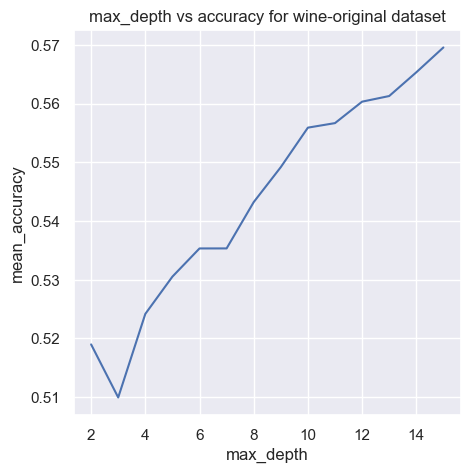

In [157]:
# 4. Wine Original Dataset
x_train, x_test, y_train, y_test = train_test_split(data_wq_stats_features,data_wq_class,test_size=0.2,random_state = 18)

parameter_grid={'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
WOD_classifier=DecisionTreeClassifier()

gs=GridSearchCV(WOD_classifier,parameter_grid,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
depth_optimum=gs.best_params_['max_depth']
accuracy_dt=gs.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_dt)

depth=range(2,16)
accuracy=[]
for i in depth:
    WOD_classifier=DecisionTreeClassifier(max_depth=i)
    accuracy_dectree=cross_val_score(WOD_classifier,x_train,y_train,cv=5)
    accuracy.append(accuracy_dectree.mean())
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('mean_accuracy')
plt.title('max_depth vs accuracy for wine-original dataset')

In [158]:
#Visualization for Wine Original Dataset
WOD_classifier=DecisionTreeClassifier(max_depth=depth_optimum)
WOD_classifier.fit(x_train,y_train)
tree_text = export_text(WOD_classifier)
print(tree_text)

|--- feature_10 <= 0.11
|   |--- feature_1 <= -0.32
|   |   |--- feature_1 <= -0.62
|   |   |   |--- feature_10 <= -1.13
|   |   |   |   |--- feature_0 <= -0.36
|   |   |   |   |   |--- feature_8 <= 0.20
|   |   |   |   |   |   |--- feature_4 <= -0.04
|   |   |   |   |   |   |   |--- feature_3 <= 0.47
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_3 >  0.47
|   |   |   |   |   |   |   |   |--- feature_2 <= 1.18
|   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_2 >  1.18
|   |   |   |   |   |   |   |   |   |--- feature_9 <= -0.58
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- feature_9 >  -0.58
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_4 >  -0.04
|   |   |   |   |   |   |   |--- feature_1 <= -0.97
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |--- feature_1 >  -0.97
|   |   |   | 

Best Max-depth is  15
Best Accuracy is  0.561092581624343


Text(0.5, 1.0, 'max_depth vs accuracy for Wine-PCA dataset')

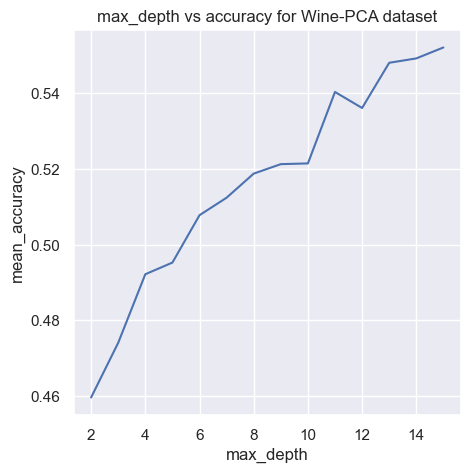

In [168]:
# 5. Wine PCA Dataset
x_train, x_test, y_train, y_test = train_test_split(data_wine_pca,data_wq_class,test_size=0.2,random_state = 18)

parameter_grid={'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
WPD_classifier=DecisionTreeClassifier()

gs=GridSearchCV(WPD_classifier,parameter_grid,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
depth_optimum=gs.best_params_['max_depth']
accuracy_dt=gs.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_dt)

depth=range(2,16)
accuracy=[]
for i in depth:
    WPD_classifier=DecisionTreeClassifier(max_depth=i)
    accuracy_dectree=cross_val_score(WPD_classifier,x_train,y_train,cv=5)
    accuracy.append(accuracy_dectree.mean())
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('mean_accuracy')
plt.title('max_depth vs accuracy for Wine-PCA dataset')

In [171]:
#Visualization for Wine PCA Dataset
WPD_classifier=DecisionTreeClassifier(max_depth=depth_optimum)
WPD_classifier.fit(x_train,y_train)
tree_text = export_text(WPD_classifier)
print(tree_text)

|--- feature_1 <= -0.87
|   |--- feature_2 <= -1.37
|   |   |--- feature_3 <= -0.77
|   |   |   |--- feature_5 <= 0.33
|   |   |   |   |--- feature_1 <= -1.68
|   |   |   |   |   |--- feature_0 <= 0.05
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_0 >  0.05
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_1 >  -1.68
|   |   |   |   |   |--- feature_4 <= 1.11
|   |   |   |   |   |   |--- feature_6 <= -0.40
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |--- feature_6 >  -0.40
|   |   |   |   |   |   |   |--- feature_7 <= -0.68
|   |   |   |   |   |   |   |   |--- feature_5 <= -0.70
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_5 >  -0.70
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_7 >  -0.68
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_4 >  1.11
|   |   |   |   |   |   |--- class: 6
|   |   |   |--

Best Max-depth is  15
Best Accuracy is  0.561099429925224


Text(0.5, 1.0, 'max_depth vs accuracy for Wine-LDA dataset')

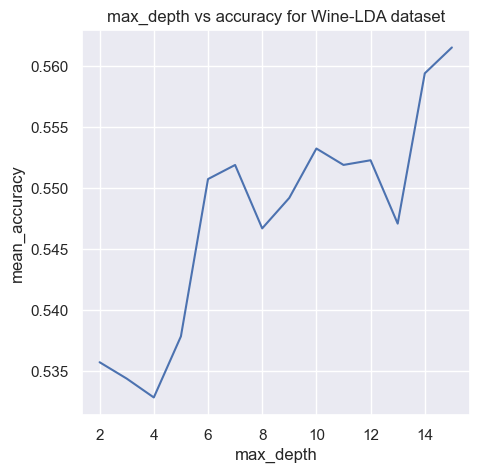

In [167]:
# 6. Wine LDA Dataset
x_train, x_test, y_train, y_test = train_test_split(data_wine_lda,data_wq_class,test_size=0.2,random_state = 18)

parameter_grid={'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
WLD_classifier=DecisionTreeClassifier()

gs=GridSearchCV(WLD_classifier,parameter_grid,cv=5,scoring='accuracy')
gs.fit(x_train,y_train)
depth_optimum=gs.best_params_['max_depth']
accuracy_dt=gs.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_dt)

depth=range(2,16)
accuracy=[]
for i in depth:
    WLD_classifier=DecisionTreeClassifier(max_depth=i)
    accuracy_dectree=cross_val_score(WLD_classifier,x_train,y_train,cv=5)
    accuracy.append(accuracy_dectree.mean())
seaborn.set(rc={'figure.figsize':(5,5)})
plt.plot(depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('mean_accuracy')
plt.title('max_depth vs accuracy for Wine-LDA dataset')

In [170]:
#Visualization for Wine LDA Dataset
WLD_classifier=DecisionTreeClassifier(max_depth=depth_optimum)
WLD_classifier.fit(x_train,y_train)
tree_text = export_text(WLD_classifier)
print(tree_text)

|--- feature_1 <= -0.87
|   |--- feature_2 <= -1.37
|   |   |--- feature_3 <= -0.77
|   |   |   |--- feature_5 <= 0.33
|   |   |   |   |--- feature_1 <= -1.68
|   |   |   |   |   |--- feature_5 <= -1.39
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_5 >  -1.39
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_1 >  -1.68
|   |   |   |   |   |--- feature_6 <= -0.40
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- feature_6 >  -0.40
|   |   |   |   |   |   |--- feature_4 <= 1.11
|   |   |   |   |   |   |   |--- feature_7 <= -0.68
|   |   |   |   |   |   |   |   |--- feature_1 <= -1.50
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- feature_1 >  -1.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- feature_7 >  -0.68
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_4 >  1.11
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |

Best Max-depth is  6
Best Accuracy is  0.2807617947960582
Best n_estimators is  150
Best parameters for Abalone original dataset:  {'max_depth': 6, 'n_estimators': 150}


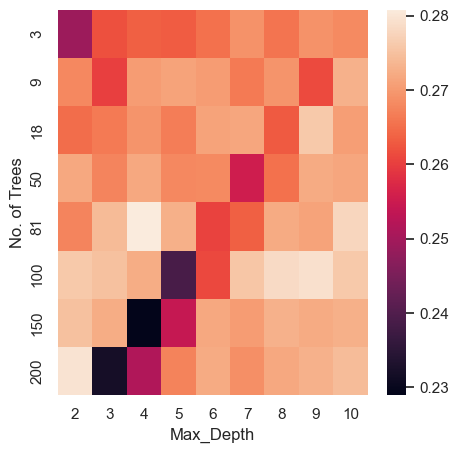

In [172]:
#4 Random Forest Classifier

# 1. Abalone Original Dataset

x_train, x_test, y_train, y_test = train_test_split(data_a_stats_features,data_a_class,test_size=0.2,random_state = 18)

rf_classifier=RandomForestClassifier()
values_of_n_estimators=[3,9,18,50,81,100,150,200]
max_depth_values=[2,3,4,5,6,7,8,9,10]
parameter_grid={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_rf=GridSearchCV(rf_classifier,parameter_grid,cv=5,scoring='accuracy')
gs_rf.fit(x_train,y_train)
mean_accuracy = gs_rf.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


depth_optimum=gs_rf.best_params_['max_depth']
best_n_estimators=gs_rf.best_params_['n_estimators']
accuracy_rf=gs_rf.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_rf)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Abalone original dataset: ',gs_rf.best_params_)




seaborn.heatmap(mean_accuracy,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  5
Best Accuracy is  0.268782166608487
Best n_estimators is  50
Best parameters for abalone LDA dataset:  {'max_depth': 5, 'n_estimators': 50}


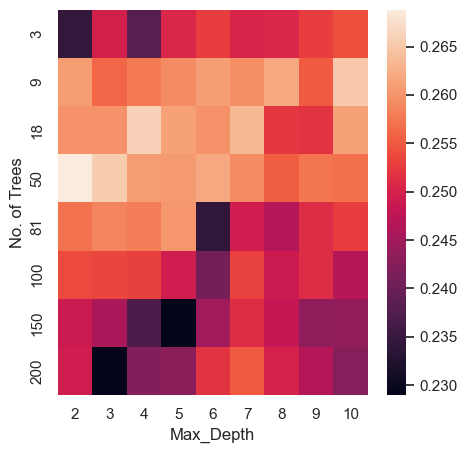

In [173]:
# 2. Abalone PCA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_abalone_pca,data_a_class,test_size=0.2,random_state = 18)

rf_classifier=RandomForestClassifier()
values_of_n_estimators=[3,9,18,50,81,100,150,200]
max_depth_values=[2,3,4,5,6,7,8,9,10]
parameter_grid={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_rf=GridSearchCV(rf_classifier,parameter_grid,cv=5,scoring='accuracy')
gs_rf.fit(x_train,y_train)


depth_optimum=gs_rf.best_params_['max_depth']
best_n_estimators=gs_rf.best_params_['n_estimators']
accuracy_rf=gs_rf.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_rf)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Abalone PCA dataset: ',gs_rf.best_params_)



mean_accuracy = gs_rf.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  4
Best Accuracy is  0.27507093436445496
Best n_estimators is  81
Best parameters for abalone LDA dataset:  {'max_depth': 4, 'n_estimators': 81}


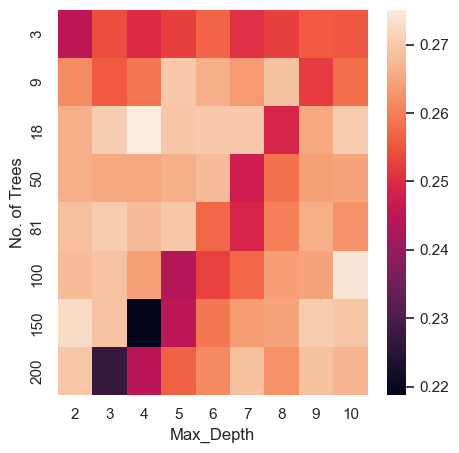

In [174]:
# 3. Abalone LDA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_abalone_lda,data_a_class,test_size=0.2,random_state = 18)

rf_classifier=RandomForestClassifier()
values_of_n_estimators=[3,9,18,50,81,100,150,200]
max_depth_values=[2,3,4,5,6,7,8,9,10]
parameter_grid={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_rf=GridSearchCV(rf_classifier,parameter_grid,cv=5,scoring='accuracy')
gs_rf.fit(x_train,y_train)


depth_optimum=gs_rf.best_params_['max_depth']
best_n_estimators=gs_rf.best_params_['n_estimators']
accuracy_rf=gs_rf.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_rf)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Abalone LDA dataset: ',gs_rf.best_params_)



mean_accuracy = gs_rf.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  10
Best Accuracy is  0.6226662101132746
Best n_estimators is  81
Best parameters for abalone LDA dataset:  {'max_depth': 10, 'n_estimators': 81}


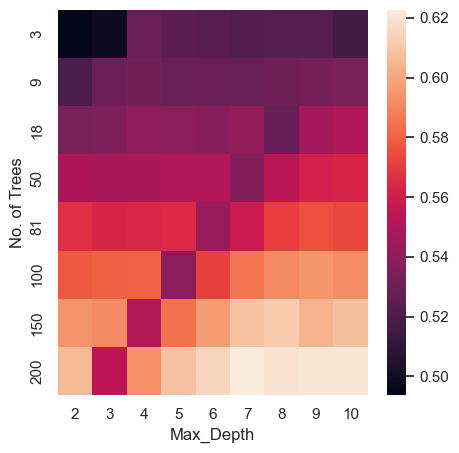

In [175]:
# 4. Wine Original Dataset

x_train, x_test, y_train, y_test = train_test_split(data_wq_stats_features,data_wq_class,test_size=0.2,random_state = 18)

rf_classifier=RandomForestClassifier()
values_of_n_estimators=[3,9,18,50,81,100,150,200]
max_depth_values=[2,3,4,5,6,7,8,9,10]
parameter_grid={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_rf=GridSearchCV(rf_classifier,parameter_grid,cv=5,scoring='accuracy')
gs_rf.fit(x_train,y_train)


depth_optimum=gs_rf.best_params_['max_depth']
best_n_estimators=gs_rf.best_params_['n_estimators']
accuracy_rf=gs_rf.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_rf)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Wine Original dataset: ',gs_rf.best_params_)



mean_accuracy = gs_rf.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  10
Best Accuracy is  0.6165084770859555
Best n_estimators is  150
Best parameters for Wine PCA dataset:  {'max_depth': 10, 'n_estimators': 150}


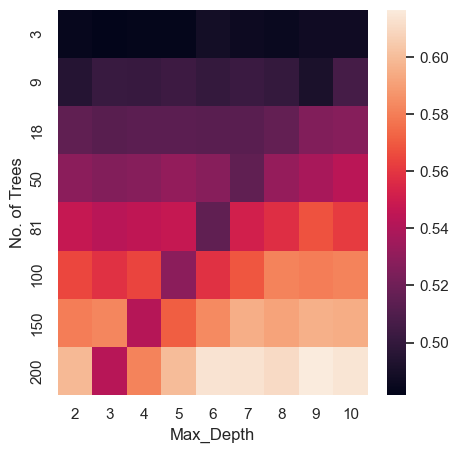

In [176]:
# 5. Wine PCA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_wine_pca,data_wq_class,test_size=0.2,random_state = 18)

rf_classifier=RandomForestClassifier()
values_of_n_estimators=[3,9,18,50,81,100,150,200]
max_depth_values=[2,3,4,5,6,7,8,9,10]
parameter_grid={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_rf=GridSearchCV(rf_classifier,parameter_grid,cv=5,scoring='accuracy')
gs_rf.fit(x_train,y_train)


depth_optimum=gs_rf.best_params_['max_depth']
best_n_estimators=gs_rf.best_params_['n_estimators']
accuracy_rf=gs_rf.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_rf)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Wine PCA dataset: ',gs_rf.best_params_)



mean_accuracy = gs_rf.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  10
Best Accuracy is  0.6070804027541274
Best n_estimators is  150
Best parameters for Wine LDA dataset:  {'max_depth': 10, 'n_estimators': 150}


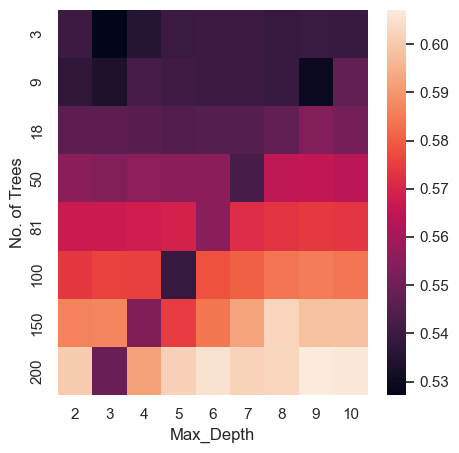

In [178]:
# 6. Wine LDA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_wine_lda,data_wq_class,test_size=0.2,random_state = 18)

rf_classifier=RandomForestClassifier()
values_of_n_estimators=[3,9,18,50,81,100,150,200]
max_depth_values=[2,3,4,5,6,7,8,9,10]
parameter_grid={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_rf=GridSearchCV(rf_classifier,parameter_grid,cv=5,scoring='accuracy')
gs_rf.fit(x_train,y_train)


depth_optimum=gs_rf.best_params_['max_depth']
best_n_estimators=gs_rf.best_params_['n_estimators']
accuracy_rf=gs_rf.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_rf)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Wine LDA dataset: ',gs_rf.best_params_)



mean_accuracy = gs_rf.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  2
Best Accuracy is  0.2639998030844141
Best n_estimators is  10
Best parameters for Abalone Original dataset:  {'max_depth': 2, 'n_estimators': 10}


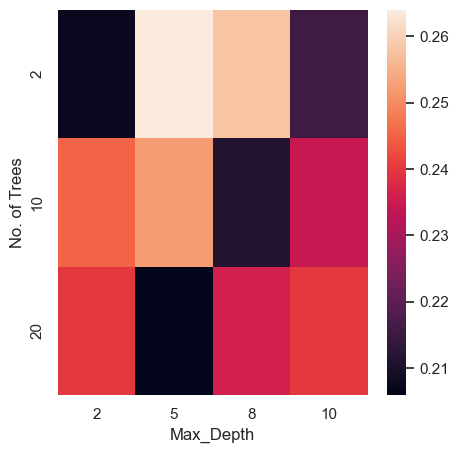

In [181]:
# 5. Gradient Tree Boosting

# 1. Abalone Original Dataset

x_train, x_test, y_train, y_test = train_test_split(data_a_stats_features,data_a_class,test_size=0.2,random_state = 18)
gtb_classifier=GradientBoostingClassifier()
values_of_n_estimators=[2,10,20]
max_depth_values=[2,5,8,10]
parameters={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_gtb=GridSearchCV(gtb_classifier,parameters,cv=5,scoring='accuracy')
gs_gtb.fit(x_train,y_train)


depth_optimum=gs_gtb.best_params_['max_depth']
best_n_estimators=gs_gtb.best_params_['n_estimators']
accuracy_gtb=gs_gtb.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_gtb)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Abalone Original dataset: ',gs_gtb.best_params_)



mean_accuracy = gs_gtb.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,annot=False,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  2
Best Accuracy is  0.2636950314617402
Best n_estimators is  10
Best parameters for Abalone PCA dataset:  {'max_depth': 2, 'n_estimators': 10}


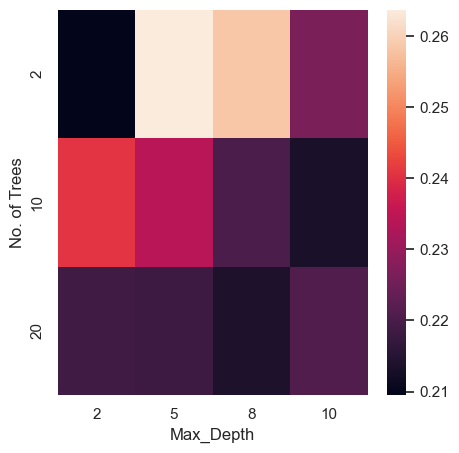

In [182]:
# 2. Abalone PCA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_abalone_pca,data_a_class,test_size=0.2,random_state = 18)
gtb_classifier=GradientBoostingClassifier()
values_of_n_estimators=[2,10,20]
max_depth_values=[2,5,8,10]
parameters={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_gtb=GridSearchCV(gtb_classifier,parameters,cv=5,scoring='accuracy')
gs_gtb.fit(x_train,y_train)


depth_optimum=gs_gtb.best_params_['max_depth']
best_n_estimators=gs_gtb.best_params_['n_estimators']
accuracy_gtb=gs_gtb.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_gtb)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Abalone PCA dataset: ',gs_gtb.best_params_)



mean_accuracy = gs_gtb.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,annot=False,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  2
Best Accuracy is  0.26848813583595144
Best n_estimators is  20
Best parameters for Abalone LDA dataset:  {'max_depth': 2, 'n_estimators': 20}


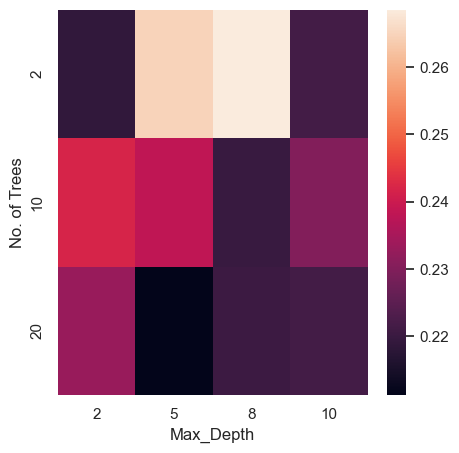

In [183]:
# 3. Abalone LDA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_abalone_lda,data_a_class,test_size=0.2,random_state = 18)
gtb_classifier=GradientBoostingClassifier()
values_of_n_estimators=[2,10,20]
max_depth_values=[2,5,8,10]
parameters={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_gtb=GridSearchCV(gtb_classifier,parameters,cv=5,scoring='accuracy')
gs_gtb.fit(x_train,y_train)


depth_optimum=gs_gtb.best_params_['max_depth']
best_n_estimators=gs_gtb.best_params_['n_estimators']
accuracy_gtb=gs_gtb.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_gtb)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Abalone LDA dataset: ',gs_gtb.best_params_)



mean_accuracy = gs_gtb.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,annot=False,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  10
Best Accuracy is  0.6282488709558007
Best n_estimators is  20
Best parameters for Wine Original dataset:  {'max_depth': 10, 'n_estimators': 20}


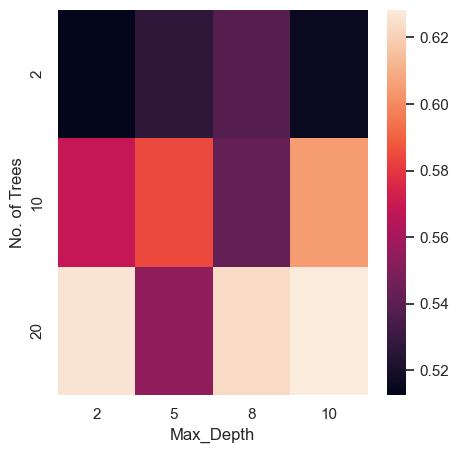

In [184]:
# 4. Wine Original Dataset

x_train, x_test, y_train, y_test = train_test_split(data_wq_stats_features,data_wq_class,test_size=0.2,random_state = 18)
gtb_classifier=GradientBoostingClassifier()
values_of_n_estimators=[2,10,20]
max_depth_values=[2,5,8,10]
parameters={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_gtb=GridSearchCV(gtb_classifier,parameters,cv=5,scoring='accuracy')
gs_gtb.fit(x_train,y_train)


depth_optimum=gs_gtb.best_params_['max_depth']
best_n_estimators=gs_gtb.best_params_['n_estimators']
accuracy_gtb=gs_gtb.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_gtb)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Wine Original dataset: ',gs_gtb.best_params_)



mean_accuracy = gs_gtb.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,annot=False,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  10
Best Accuracy is  0.6168923521137188
Best n_estimators is  20
Best parameters for Wine PCA dataset:  {'max_depth': 10, 'n_estimators': 20}


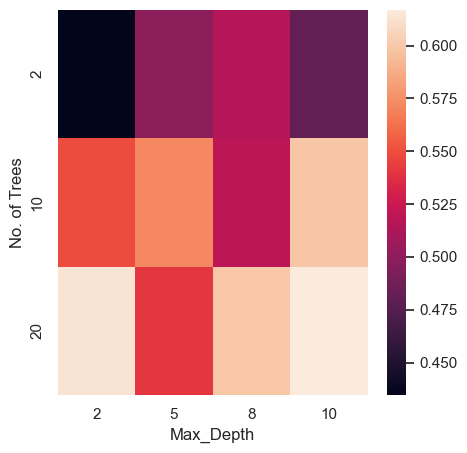

In [185]:
# 5. Wine PCA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_wine_pca,data_wq_class,test_size=0.2,random_state = 18)
gtb_classifier=GradientBoostingClassifier()
values_of_n_estimators=[2,10,20]
max_depth_values=[2,5,8,10]
parameters={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_gtb=GridSearchCV(gtb_classifier,parameters,cv=5,scoring='accuracy')
gs_gtb.fit(x_train,y_train)


depth_optimum=gs_gtb.best_params_['max_depth']
best_n_estimators=gs_gtb.best_params_['n_estimators']
accuracy_gtb=gs_gtb.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_gtb)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Wine PCA dataset: ',gs_gtb.best_params_)



mean_accuracy = gs_gtb.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,annot=False,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

Best Max-depth is  10
Best Accuracy is  0.6242039312948842
Best n_estimators is  20
Best parameters for Wine LDA dataset:  {'max_depth': 10, 'n_estimators': 20}


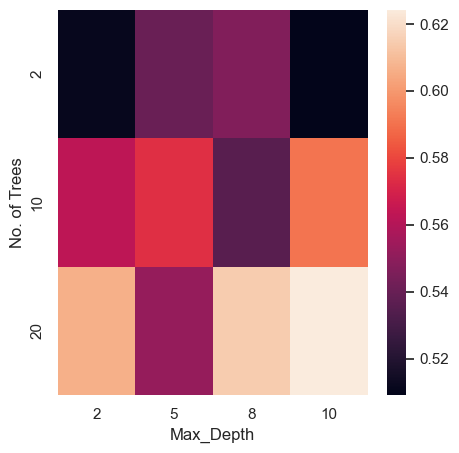

In [186]:
# 6. Wine LDA Dataset

x_train, x_test, y_train, y_test = train_test_split(data_wine_lda,data_wq_class,test_size=0.2,random_state = 18)
gtb_classifier=GradientBoostingClassifier()
values_of_n_estimators=[2,10,20]
max_depth_values=[2,5,8,10]
parameters={'n_estimators':values_of_n_estimators,'max_depth':max_depth_values}
gs_gtb=GridSearchCV(gtb_classifier,parameters,cv=5,scoring='accuracy')
gs_gtb.fit(x_train,y_train)


depth_optimum=gs_gtb.best_params_['max_depth']
best_n_estimators=gs_gtb.best_params_['n_estimators']
accuracy_gtb=gs_gtb.best_score_
print('Best Max-depth is ',depth_optimum)
print('Best Accuracy is ',accuracy_gtb)
print('Best n_estimators is ',best_n_estimators)
print('Best parameters for Wine LDA dataset: ',gs_gtb.best_params_)



mean_accuracy = gs_gtb.cv_results_['mean_test_score']
mean_accuracy = mean_accuracy.reshape(len(values_of_n_estimators), len(max_depth_values))


seaborn.heatmap(mean_accuracy,annot=False,xticklabels=max_depth_values, yticklabels=values_of_n_estimators)
plt.xlabel('Max_Depth')
plt.ylabel('No. of Trees')
plt.show()

In [187]:
print('Tables summarizing all the final results')

print('Table summarizing all the final results of wine dataset')

data1={'Classification algorithm': ['kNN','Multinomial Naive Bayes','Complement Naive Bayes','Decision Tree','Random Forest','Gradient Boosted Tree'],'setting':['*','*','*','*','*','*'],
      'wine_raw':['0.68','0.453','0.40','0.565','0.63','0.639'],
      'wine_pca':['0.6854','0.436','0.42','0.555','0.611','0.630'],
      'wine_lda':['0.563','0.436','0.438','0.566','0.610','0.627']}
table1=pd.DataFrame(data1)
print('\n\n\n')
print('Accuracy table for Wine datasets')
print(table1)



data2={'Classification algorithm': ['kNN','Multinomial Naive Bayes','Complement Naive Bayes','Decision Tree','Random Forest','Gradient Boosted Tree'],'setting':['*','*','*','*','*','*'],
      'abalone_raw':['0.294','0.1655','0.172','0.26','0.274','0.257'],
      'abalone_pca':['0.2727','0.1658','0.175','0.2535','0.268','0.245'],
      'abalone_lda':['0.31','0.1658','0.245','0.253','0.265','0.26']}
table2=pd.DataFrame(data2)
print('\n\n\n')
print('Accuracy table for Abalone datasets')
print(table2)

Tables summarizing all the final results
Table summarizing all the final results of wine dataset




Accuracy table for Wine datasets
  Classification algorithm setting wine_raw wine_pca wine_lda
0                      kNN       *     0.68   0.6854    0.563
1  Multinomial Naive Bayes       *    0.453    0.436    0.436
2   Complement Naive Bayes       *     0.40     0.42    0.438
3            Decision Tree       *    0.565    0.555    0.566
4            Random Forest       *     0.63    0.611    0.610
5    Gradient Boosted Tree       *    0.639    0.630    0.627




Accuracy table for Abalone datasets
  Classification algorithm setting abalone_raw abalone_pca abalone_lda
0                      kNN       *       0.294      0.2727        0.31
1  Multinomial Naive Bayes       *      0.1655      0.1658      0.1658
2   Complement Naive Bayes       *       0.172       0.175       0.245
3            Decision Tree       *        0.26      0.2535       0.253
4            Random Forest       *   